In [1]:
import sys
sys.path.append('..')

from baselines.gnn.trainer import Trainer

/home/kamil/Desktop/git/meteoapp-data/venv/lib/python3.11/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.30.0
  warnings.warn(


In [ ]:
# CGCN; subset=100; h=32; subset=100
# Epoch 1/1000, Train Loss: 4095.0765, lr: 0.01
# Val Loss: 2965.3
# ...
# To ~ 1800 it overfits very fast; later slowly
# Epoch 1000/1000, Train Loss: 1075.0950, lr: 3.90625e-05
# Val Loss: 3720.9413

Epoch 995/1000, Train Loss: 1075.4420, lr: 3.90625e-05
Val Loss: 3711.4182
---------
Epoch 996/1000, Train Loss: 1075.4676, lr: 3.90625e-05
Val Loss: 3721.9405
---------
Epoch 997/1000, Train Loss: 1075.3523, lr: 3.90625e-05
Val Loss: 3713.0768
---------
Epoch 998/1000, Train Loss: 1075.3129, lr: 3.90625e-05
Val Loss: 3721.6579
---------
Epoch 999/1000, Train Loss: 1075.1781, lr: 3.90625e-05
Val Loss: 3716.4704
---------
Epoch 1000/1000, Train Loss: 1075.0950, lr: 3.90625e-05
Val Loss: 3720.9413
---------
1956.2399253845215 [s]


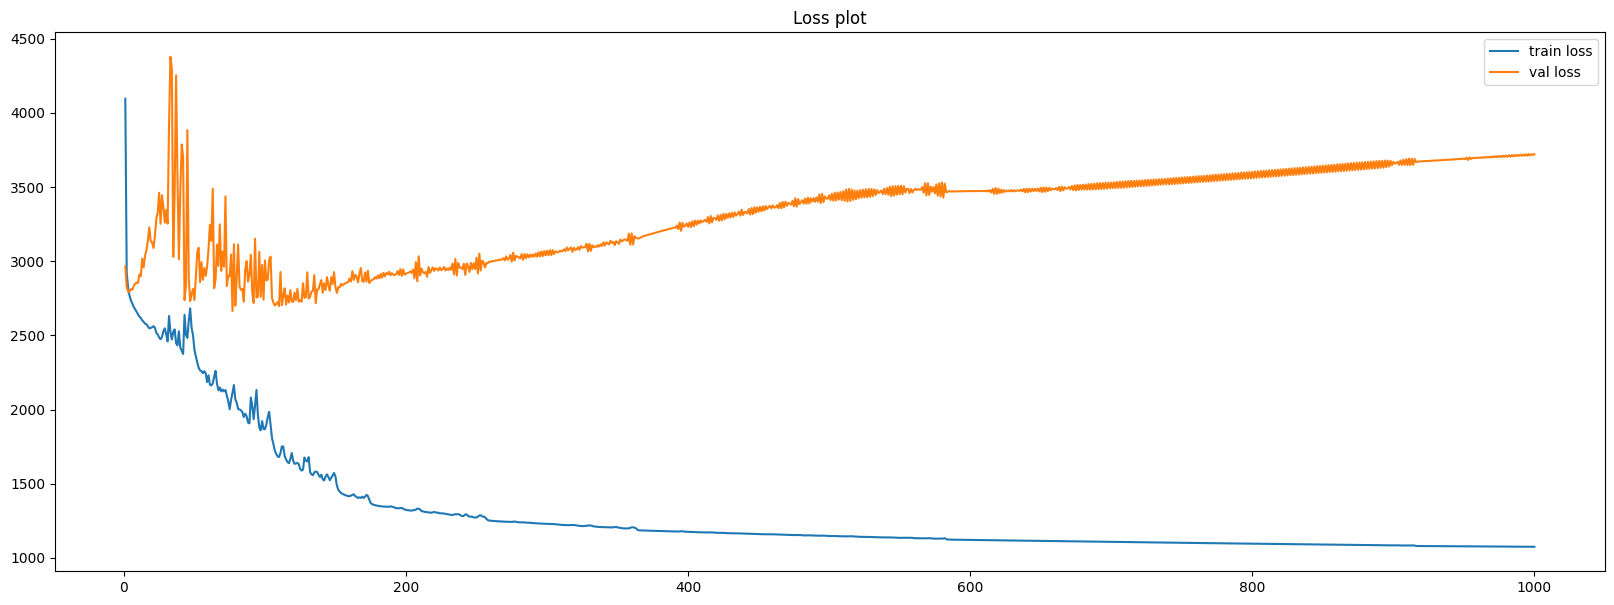

In [3]:
trainer = Trainer(architecture='cgcn', subset=100, hidden_dim=32, lr=0.01)
trainer.train(num_epochs=1000)

RMSE for f0: 1.7864570617675781; MAE for f0: 1.3974201679229736;
RMSE for f1: 2.1717543601989746; MAE for f1: 1.7620666027069092;
RMSE for f2: 0.14546436071395874; MAE for f2: 0.10998097062110901;
RMSE for f3: 1.0621522665023804; MAE for f3: 0.7829591035842896;
RMSE for f4: 1.0440430641174316; MAE for f4: 0.7636282444000244;
RMSE for f5: 0.00012992575648240745; MAE for f5: 6.988959648879245e-05;


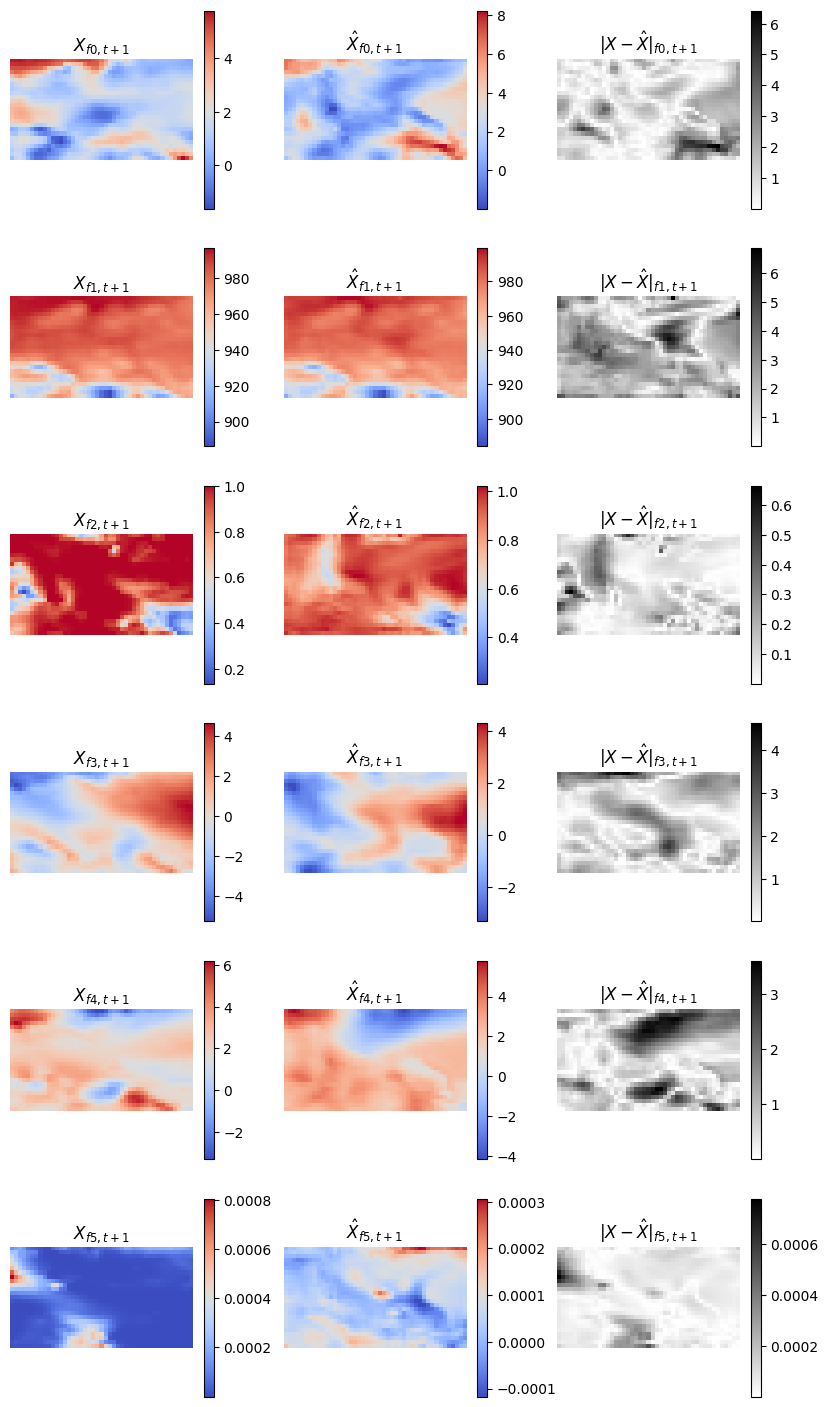

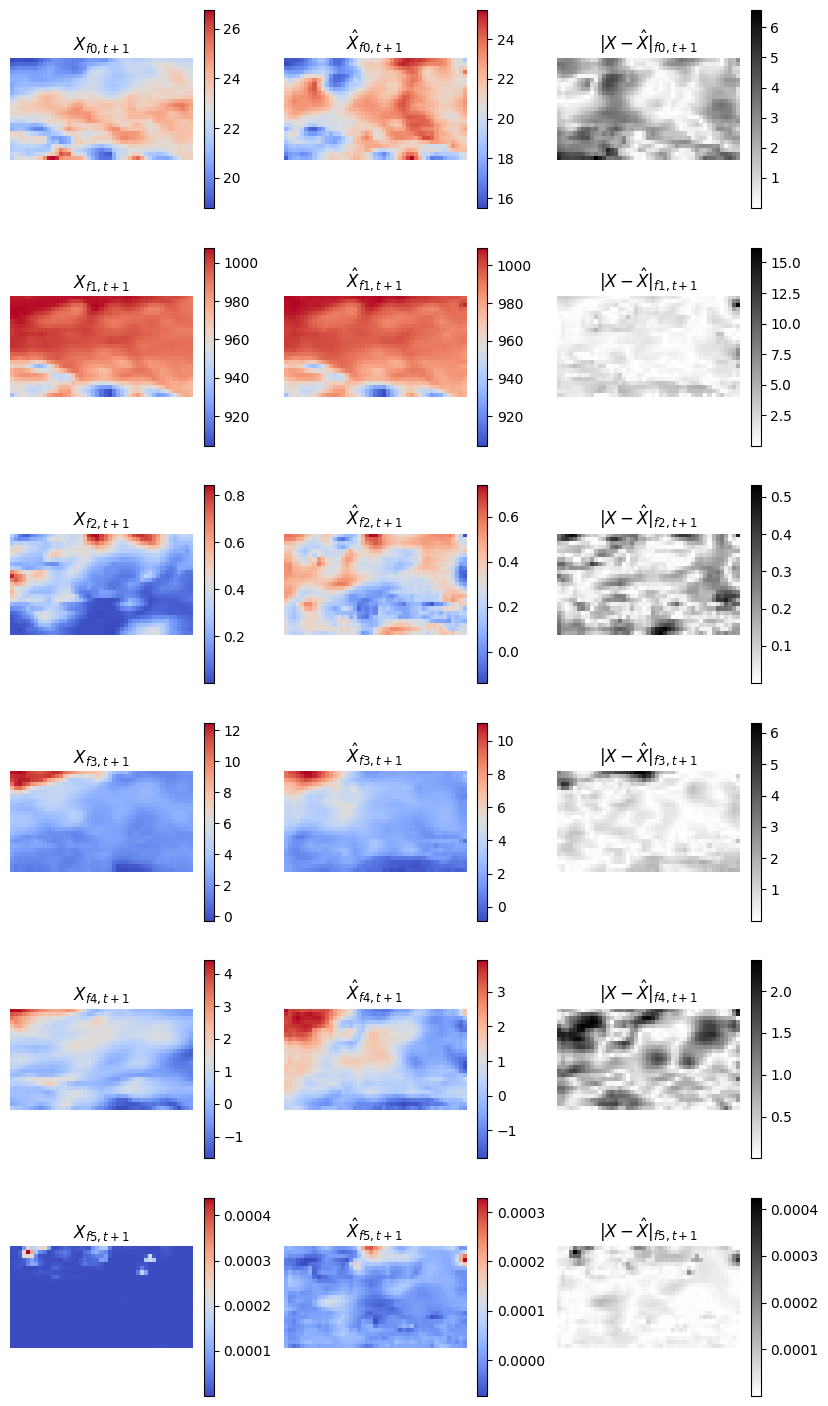

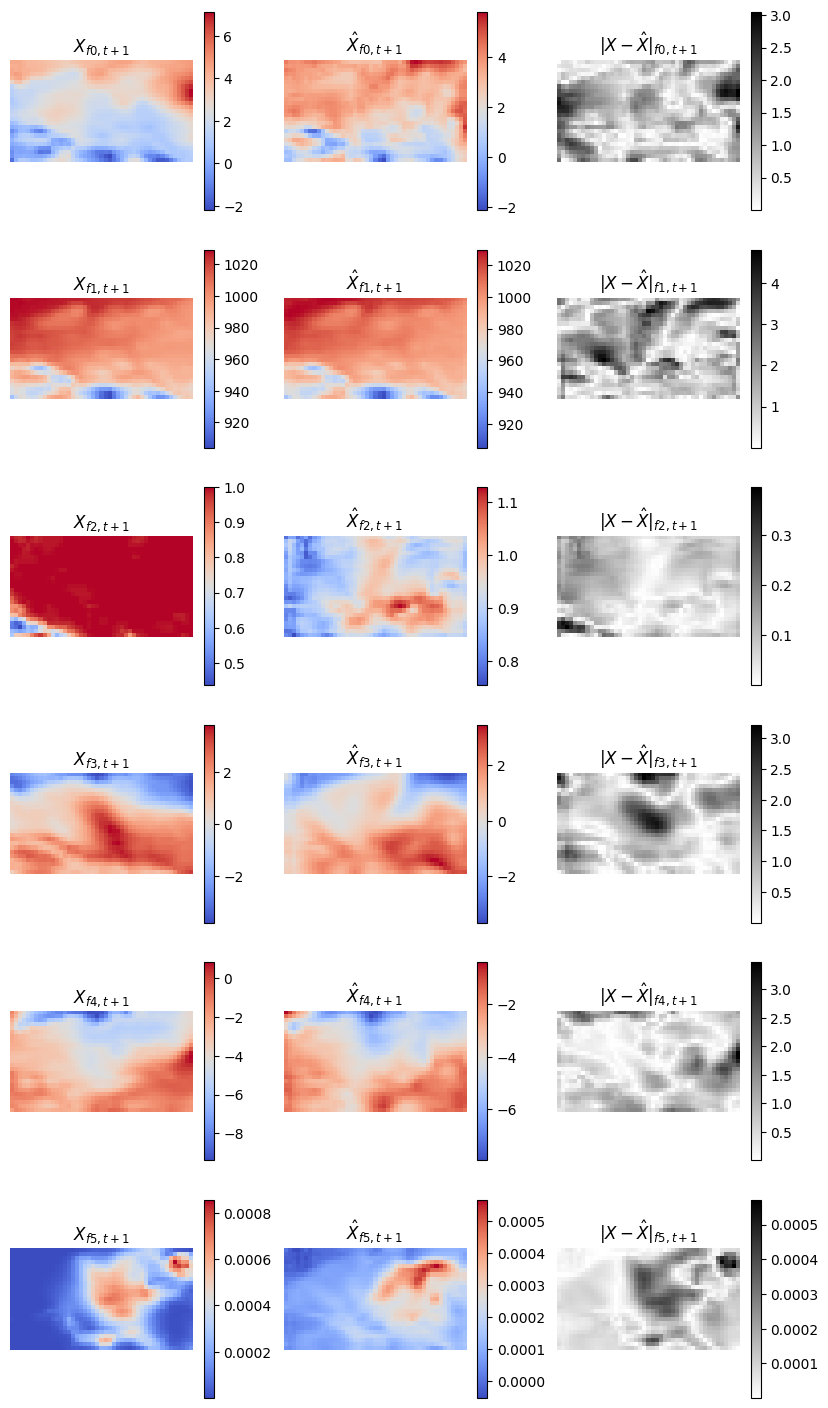

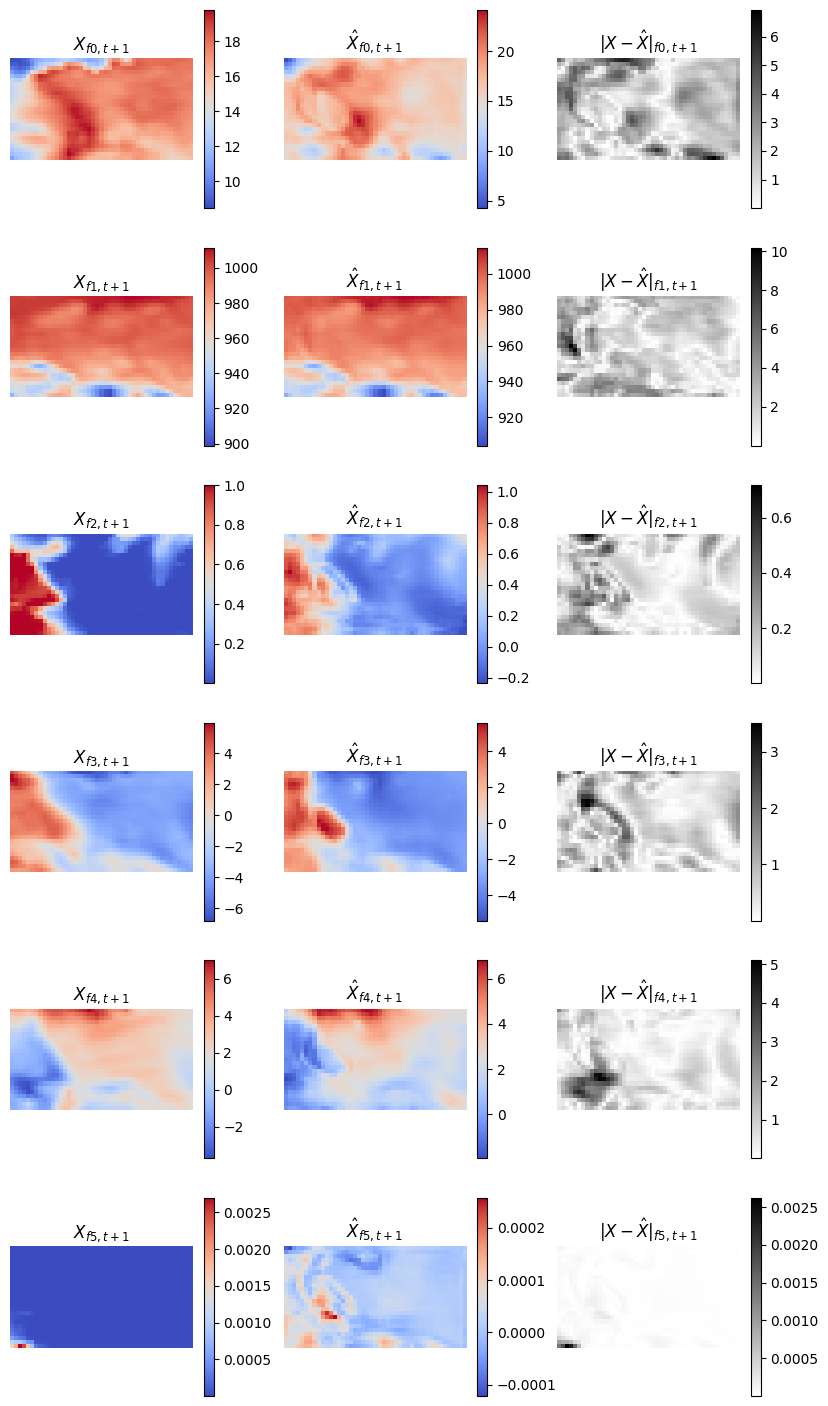

In [4]:
trainer.plot_predictions(data_type='train')

In [5]:
trainer.evaluate("train")

RMSE for f0: 2.1550091207258872; MAE for f0: 1.637953076838917;
RMSE for f1: 2.042042025577641; MAE for f1: 1.52422642320421;
RMSE for f2: 0.20643148846236992; MAE for f2: 0.15133247959042684;
RMSE for f3: 1.1468706652266853; MAE for f3: 0.8630324727875958;
RMSE for f4: 1.08944906535878; MAE for f4: 0.8209157761539372;
RMSE for f5: 0.00015179199025908488; MAE for f5: 7.109197904489216e-05;


In [6]:
trainer.evaluate("test")

RMSE for f0: 2.908907911833305; MAE for f0: 2.206936608215632;
RMSE for f1: 2.6144202066350726; MAE for f1: 1.8509925363498263;
RMSE for f2: 0.33749976022475786; MAE for f2: 0.2521314547684233;
RMSE for f3: 1.5970286809055358; MAE for f3: 1.1761151663883052;
RMSE for f4: 1.6353009715286673; MAE for f4: 1.1745305193878377;
RMSE for f5: 0.0003982140822050852; MAE for f5: 0.0001287281932411988;


# [A3TGCN]

## Best overfit:
 
---------
Epochs = 200; hidden = 1024

RMSE for f0: 1.1007113849840253

RMSE for f1: 6.182032024036881

RMSE for f2: 0.11709922635573465

RMSE for f3: 1.0938558029230945

RMSE for f4: 1.135363085849578

RMSE for f5: 5.304731379016946e-05

* predicitons of mini-batches looks similar in terms of accurayc but it doesn't look like it is possible to overfit for batch_size > 1
* [with only one MLP] after SE $\approx$ 21; loss decreases very slowly
* [with more MLP] it looks a little better after SE $\approx$ 17 loss decreases slowly; after 1k epochs: SE-11; hidden_dim / 2 in each linear layer; for linear layers with same size similar resutls

---------

# [CGCN]

## Best overfit - only first mini batch is nice:

---------

### for batch_size = 1:

N = 5; Epochs = 3000; hidden = 1024

RMSE for f0: 0.46053606271743774; MAE for f0: 0.34814876317977905;

RMSE for f1: 0.5324509739875793; MAE for f1: 0.3963014781475067;

RMSE for f2: 0.06111479550600052; MAE for f2: 0.04281201213598251;

RMSE for f3: 0.5062028765678406; MAE for f3: 0.3906308114528656;

RMSE for f4: 0.511387050151825; MAE for f4: 0.4053451120853424;

RMSE for f5: 4.359076774562709e-05; MAE for f5: 2.7624157155514695e-05;



* loss convergence to ~0 is much slower than in GCN; model struggles to achieve SE less than **10** - loss decrease is extremely little each epoch after that; after 3k epochs it is SE $\approx$ 4.9

* overfit process looks kinda worse than in GCN I guess, the val_loss is lower though

* prediction plots looks smoother than those from GCN
<br>

After using basic edge_attr:

* convergence to ~0 is a little faster I guess; after 2k epoch SE $\approx$ 5.1

RMSE for f0: 0.5378605969502436; MAE for f0: 0.4116863712567267;

RMSE for f1: 0.5801239272308413; MAE for f1: 0.43263243272569446;

RMSE for f2: 0.06308332136000509; MAE for f2: 0.04308025844891866;

RMSE for f3: 0.5010276104107196; MAE for f3: 0.3898159819923393;

RMSE for f4: 0.5142384579445146; MAE for f4: 0.40151560864514774;

RMSE for f5: 5.695505041428303e-05; MAE for f5: 3.787352560382513e-05;

<br>
After using no edge_attr nor edge_weights - same results :((( 

* after 2k epochs SE $\approx$ 4.9

RMSE for f0: 0.5154228210449219; MAE for f0: 0.3955957591533661;

RMSE for f1: 0.616793692111969; MAE for f1: 0.4610046148300171;

RMSE for f2: 0.06191185861825943; MAE for f2: 0.042094070464372635;

RMSE for f3: 0.5192311406135559; MAE for f3: 0.40097156167030334;

RMSE for f4: 0.47820839285850525; MAE for f4: 0.37651485204696655;

RMSE for f5: 4.282597728888504e-05; MAE for f5: 2.9758122764178552e-05;

<br>

With updated edge_attr maaaaaybe slightly better idk?

* after 2k epochs SE $\approx$ 4.1

RMSE for f0: 0.487577348947525; MAE for f0: 0.3760671019554138;

RMSE for f1: 0.6514126658439636; MAE for f1: 0.4907068610191345;

RMSE for f2: 0.05654036998748779; MAE for f2: 0.03860820084810257;

RMSE for f3: 0.4825141429901123; MAE for f3: 0.3743925094604492;

RMSE for f4: 0.43773719668388367; MAE for f4: 0.3455958366394043;

RMSE for f5: 4.442723002284765e-05; MAE for f5: 2.835924351529684e-05;

---------

# [GCN]

## Best overfit: 

1st mini-batch looks noisy on plots, 

Not sure if inverse transform is fine

t2m in mini-batches > 1 are in weird scale - with 0 mean? std ~ 1

---------

### for batch_size = 1:

N = 5; Epochs = 1794; hidden = 1024

RMSE for f0: 0.2709898352622986; MAE for f0: 0.17411679029464722;

RMSE for f1: 0.9162903428077698; MAE for f1: 0.5823767185211182;

RMSE for f2: 0.007963583804666996; MAE for f2: 0.004284282214939594;

RMSE for f3: 0.19165192544460297; MAE for f3: 0.12410622835159302;

RMSE for f4: 0.21218980848789215; MAE for f4: 0.12774522602558136;

RMSE for f5: 2.9874003303120844e-05; MAE for f5: 1.6733891243347898e-05;


* it is definetaly the fastest training process; convergence looks good, after 1.7k epoch SE $\approx$ 0.2; other experiment 3k epochs SE $\approx$ 0.6
* decrasing hidden_dim to 256 -> epoch 4k. SE $\approx$ 1.1; RMSE f0 - 0.55, RMSE f1 -> 2.

### for batch_size = 4:

RMSE for f0: 0.5673630833625793; MAE for f0: 0.3919491171836853;

RMSE for f1: 1.640638828277588; MAE for f1: 1.1147913932800293;

RMSE for f2: 0.014014026150107384; MAE for f2: 0.008001776412129402;

RMSE for f3: 0.4537373185157776; MAE for f3: 0.301805704832077;

RMSE for f4: 0.41247645020484924; MAE for f4: 0.2598435878753662;

RMSE for f5: 6.930914969416335e-05; MAE for f5: 3.580433622119017e-05;

After 3k epoch SE $\approx$ 0.8; hidden=1024

### for batch_size = 32 (plots are kinda noisy but it still overfit pretty ok?) :

RMSE for f0: 1.00359737230392; MAE for f0: 0.7348482976609693;

RMSE for f1: 3.519246861894878; MAE for f1: 2.5813824818929034;

RMSE for f2: 0.03600320123506689; MAE for f2: 0.01963227628564669;

RMSE for f3: 0.9141614341014068; MAE for f3: 0.6554838256781391;

RMSE for f4: 0.8640779164793619; MAE for f4: 0.6287803415469534;

RMSE for f5: 0.00015852658515357014; MAE for f5: 9.89001418981821e-05;

* After 2k epochs SE $\approx$ 4; hidden=1024


### Full training:

N = 5; hidden = 256; batch=4

RMSE for f0: 6.057778648517553; MAE for f0: 4.787944748312894;

RMSE for f1: 8.216086426384388; MAE for f1: 6.418473183528259;

RMSE for f2: 0.26353396146013697; MAE for f2: 0.19950958294953372;

RMSE for f3: 2.0419449013364606; MAE for f3: 1.5629899934557656;

RMSE for f4: 2.105134228203406; MAE for f4: 1.6288272409697975;

RMSE for f5: 0.0003035589159654516; MAE for f5: 0.00011708228228673238;

* it is very bad and noisy

Epoch 161/1000, Train Loss: 100.1107, lr: 3.125e-05
Val Loss: 131.3151

Early stopping ....
1821.1647243499756 [s]

---------